# BayesianSimulatedData2

Compare LDA, QDA, and NB for both schemes (compute accuracy on the testing
set) for fixed value a = 2 and different values of ρ = 0, 0.1, 0.3, 0.5, 0.7, 0.9. Repeat the
experiment for different train/test splits and generate boxplots showing the values of
accuracy for each method and each value of the parameter ρ. Save the results in the
file BayesianSimulatedData2.pdf


In scheme 1 dataset we don't use rho as variable, so I did not calculate it. Results of that can be seen in BayesianSimulatedData1.pdf for a=2 rho=0.5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.metrics import accuracy_score

from scheme_dataset import scheme1_dataset, scheme2_dataset

from LDA import LDA
from QDA import QDA
from NB import NB

np.random.seed(123)

In [2]:
a = 2
rho_values = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
nr_experiments = 10
results = {"Experiment": [], "Schema": [], "rho": [], "Model": [], "Accuracy": []} 
model_names = {"LDA": LDA(), "QDA": QDA(), "NB":NB()}

for experiment in range(nr_experiments): 
    for rho in rho_values: 
        # Define train and test dataset
        scheme2_train_X, scheme2_train_y = scheme2_dataset(a, rho)
        scheme2_test_X, scheme2_test_y = scheme2_dataset(a, rho)
        
        for model_name in model_names.keys(): 
            # Schema 2
            model = model_names[model_name]
            model.fit(scheme2_train_X, scheme2_train_y)
            model_predictions = model.predict(scheme2_test_X)
            model_acc = accuracy_score(scheme2_test_y, model_predictions)
            results["Experiment"].append(experiment)
            results["Schema"].append("Schema 2")
            results["rho"].append(rho)
            results["Model"].append(model_name)
            results["Accuracy"].append(model_acc)

results = pd.DataFrame(results)
results.head()

,Experiment,Schema,rho,Model,Accuracy
0,0,Schema 2,0.0,LDA,0.909
1,0,Schema 2,0.0,QDA,0.908
2,0,Schema 2,0.0,NB,0.912
3,0,Schema 2,0.1,LDA,0.917
4,0,Schema 2,0.1,QDA,0.924


In [3]:
results.groupby(["Schema", "Model", "rho"]).agg({"Accuracy": "mean"})

Accuracy
Schema   Model rho          
Schema 2 LDA   0.0    0.9147
               0.1    0.9219
               0.3    0.9266
               0.5    0.9276
               0.7    0.9269
               0.9    0.9264
         NB    0.0    0.9138
               0.1    0.9232
               0.3    0.9248
               0.5    0.9275
               0.7    0.9270
               0.9    0.9268
         QDA   0.0    0.9141
               0.1    0.9237
               0.3    0.9292
               0.5    0.9384
               0.7    0.9466
               0.9    0.9692

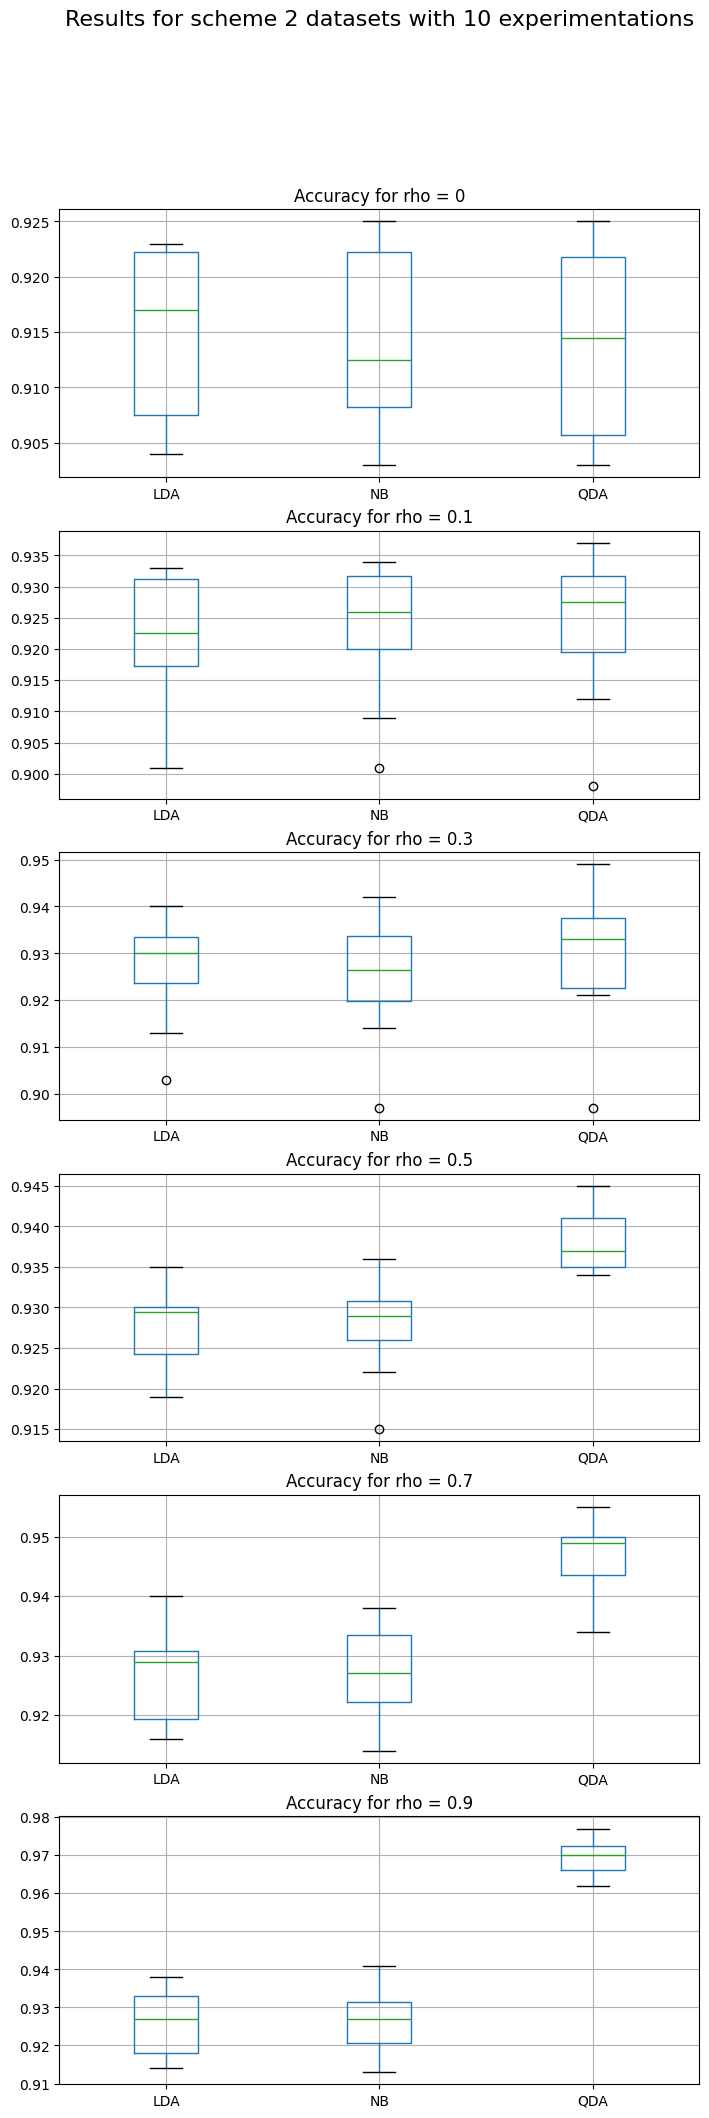

In [4]:
fig, axs = plt.subplots(len(rho_values), 1, figsize=(8, 25))

for i, rho in enumerate(rho_values):
    res = results[results["Schema"] == "Schema 2"]
    res = res[res["rho"] == rho]
    res[["Accuracy", "Model"]].boxplot("Accuracy", "Model", ax=axs[i])
    
    axs[i].set_xlabel("")
    axs[i].set_title(f"Accuracy for rho = {rho}")

plt.suptitle("Results for scheme 2 datasets with 10 experimentations", fontsize=16)
plt.show()